<a href="https://colab.research.google.com/github/Nipuni-Peiris/EDA-project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [ ]:
path = kagglehub.dataset_download("pranavuikey/black-friday-sales-eda")
csv_file_path = os.path.join(path, 'train.csv')

df = pd.read_csv(csv_file_path) #read the csv file
df.head()

100%|██████████| 5.48M/5.48M [00:00<00:00, 64.4MB/s]

Extracting files...


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#Data Preprocessing

In [ ]:
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
39708,1000107,P00010842,M,46-50,18,C,4+,0,8,16.0,NaN,6173
268896,1005443,P00129542,M,26-35,12,B,2,0,8,14.0,NaN,7797
397474,1001182,P00127942,M,0-17,10,B,3,0,1,2.0,5.0,7839
442513,1002047,P00161942,M,0-17,10,B,1,0,5,8.0,NaN,7031
185995,1004681,P00209842,F,36-45,15,C,2,0,5,8.0,NaN,8645


In [ ]:
df.shape

(550068, 12)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


In [ ]:
df.Product_Category_2.fillna(0,inplace=True)
df.Product_Category_3.fillna(0,inplace=True)
df.isnull().sum()

<ipython-input-7-1437b9ce6eae>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Product_Category_2.fillna(0,inplace=True)
<ipython-input-7-1437b9ce6eae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


In [ ]:
new_df = df.drop(columns=['User_ID','Product_ID'])
new_df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,0.0,0.0,368
550064,F,26-35,1,C,3,0,20,0.0,0.0,371
550065,F,26-35,15,B,4+,1,20,0.0,0.0,137
550066,F,55+,1,C,2,0,20,0.0,0.0,365


In [ ]:
#Give the summary ofthe numerical data
new_df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
#Give the summary ofthe non-numerical or categorical data
new_df.describe(include='object')

,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068
unique,2,7,3,5
top,M,26-35,B,1
freq,414259,219587,231173,193821


##Analysing

In [ ]:
#Define a new column as age group according to their age
def ages(value):

    if '0-17' in value:
        value = value.replace('0-17','Child')
        return str(value)
    elif '18-25' in value:
        value = value.replace('18-25','Tennager')
        return str(value)
    elif '26-35' in value:
        value = value.replace('26-35','Adult')
        return str(value)
    elif '36-45' in value:
        value = value.replace('36-45','Adult')
        return str(value)
    elif '46-50' in value:
        value = value.replace('46-50','Adult')
        return str(value)
    elif '51-55' in value:
        value = value.replace('51-55','Old')
        return str(value)
    else:
        value = value.replace('55+','Old')
        return str(value)

new_df['Age_group'] = new_df['Age'].apply(ages)
new_df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_group
0,F,0-17,10,A,2,0,3,0.0,0.0,8370,Child
1,F,0-17,10,A,2,0,1,6.0,14.0,15200,Child
2,F,0-17,10,A,2,0,12,0.0,0.0,1422,Child
3,F,0-17,10,A,2,0,12,14.0,0.0,1057,Child
4,M,55+,16,C,4+,0,8,0.0,0.0,7969,Old
...,...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,0.0,0.0,368,Old
550064,F,26-35,1,C,3,0,20,0.0,0.0,371,Adult
550065,F,26-35,15,B,4+,1,20,0.0,0.0,137,Adult
550066,F,55+,1,C,2,0,20,0.0,0.0,365,Old


In [ ]:
age_column_index=new_df.columns.get_loc('Age')
new_df.insert(age_column_index+1,'Age_group',new_df.pop('Age_group'))
new_df

,Gender,Age,Age_group,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,Child,10,A,2,0,3,0.0,0.0,8370
1,F,0-17,Child,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,Child,10,A,2,0,12,0.0,0.0,1422
3,F,0-17,Child,10,A,2,0,12,14.0,0.0,1057
4,M,55+,Old,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,Old,13,B,1,1,20,0.0,0.0,368
550064,F,26-35,Adult,1,C,3,0,20,0.0,0.0,371
550065,F,26-35,Adult,15,B,4+,1,20,0.0,0.0,137
550066,F,55+,Old,1,C,2,0,20,0.0,0.0,365


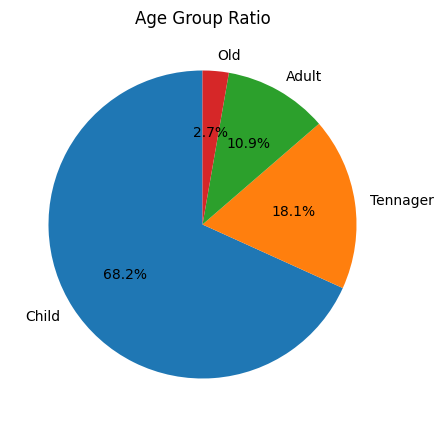

In [ ]:
age_values= new_df['Age_group'].value_counts()
categories = ['Child','Tennager','Adult','Old']
plt.figure(figsize=(5, 5))
plt.pie(age_values,labels=categories,autopct='%1.1f%%',startangle=90)
plt.title('Age Group Ratio')
plt.show()

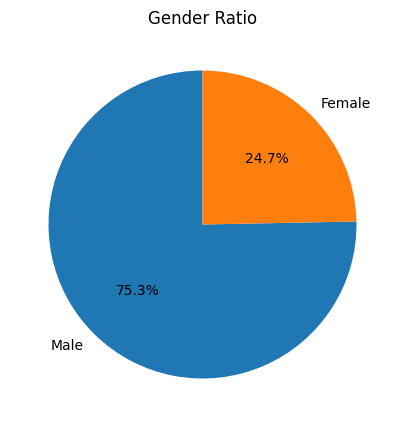

In [ ]:
gender_values = new_df['Gender'].value_counts()
categories = ['Male','Female']
plt.figure(figsize=(5, 5))
plt.pie(gender_values,labels=categories,autopct='%1.1f%%',startangle=90)
plt.title('Gender Ratio')
plt.show()

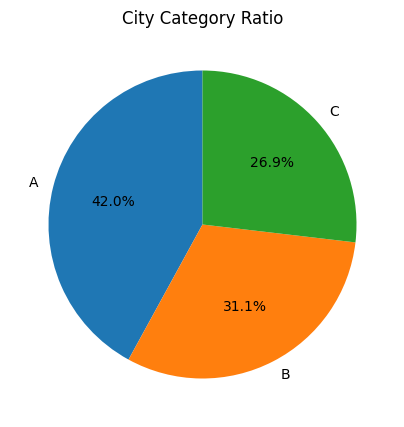

In [ ]:
city_values = new_df['City_Category'].value_counts()
categories = ['A','B','C']
plt.figure(figsize=(5, 5))
plt.pie(city_values,labels=categories,autopct='%1.1f%%',startangle=90)
plt.title('City Category Ratio')
plt.show()


In [ ]:
#Calculate the total number of purchases done by the user,how much amount they spent in total and on avaerage
groupby_user = df.groupby('User_ID').agg(
    total_orders = ('User_ID','count'),
    total_amount_spent = ('Purchase','sum'),
    average_amount_spent = ('Purchase','mean')
    ).reset_index()
groupby_user["User_ID"] = groupby_user["User_ID"].astype(str)
groupby_user = groupby_user.rename(columns={'count': 'total_orders'})

<ipython-input-64-5ea8614d7169>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=groupby_user.sort_values(by='total_orders',ascending=False).head(10),x='User_ID',y='total_orders',width=0.3,palette=random_colors)
<ipython-input-64-5ea8614d7169>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=groupby_user.sort_values(by='total_amount_spent',ascending=False).head(10),x='User_ID',y='total_amount_spent',width=0.3,palette=random_colors)
<ipython-input-64-5ea8614d7169>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=groupby_user.

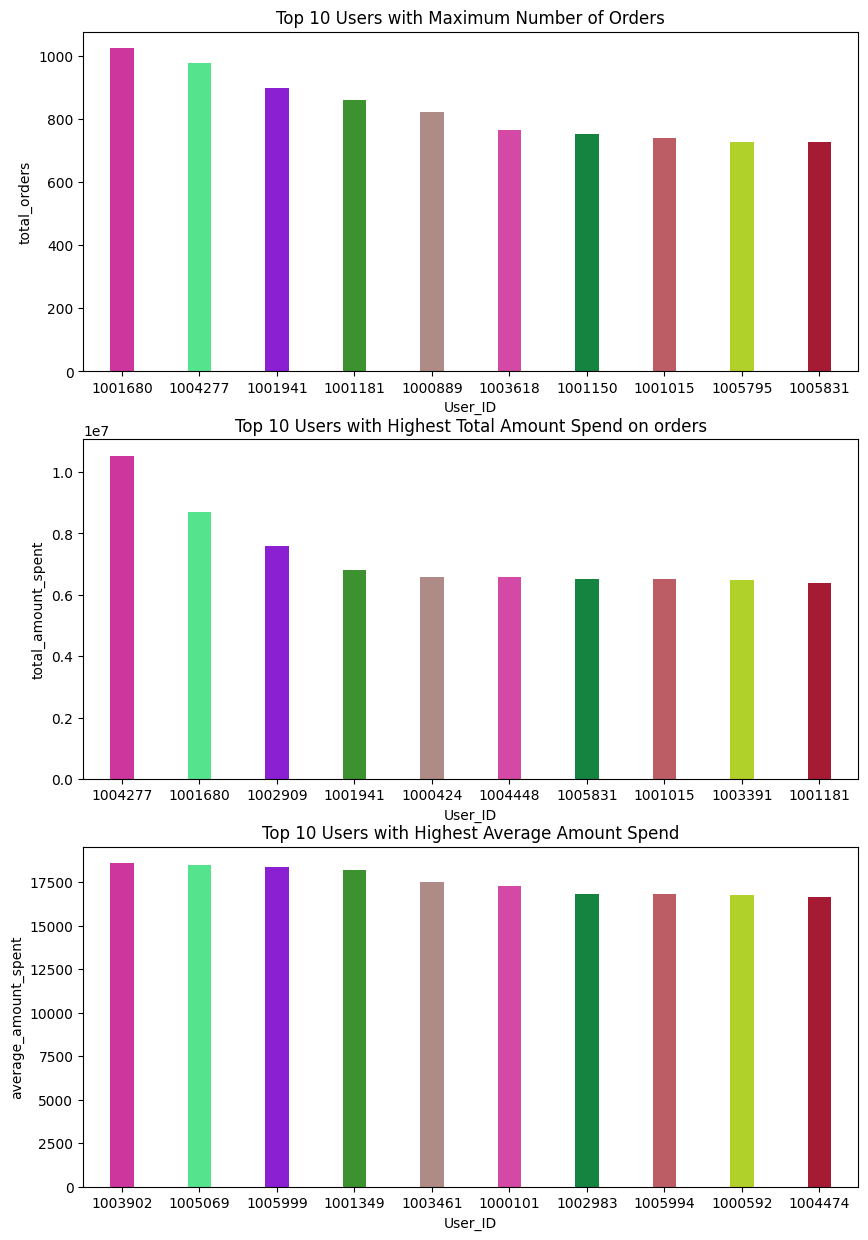

In [ ]:
#Finding out top 10 users with most number of orders, total amount spent and avaerage amount spent on each other
random_colors = [tuple(np.random.rand(3)) for _ in range(10)]
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
sns.barplot(data=groupby_user.sort_values(by='total_orders',ascending=False).head(10),x='User_ID',y='total_orders',width=0.3,palette=random_colors)
plt.title('Top 10 Users with Maximum Number of Orders')

plt.subplot(3,1,2)
sns.barplot(data=groupby_user.sort_values(by='total_amount_spent',ascending=False).head(10),x='User_ID',y='total_amount_spent',width=0.3,palette=random_colors)
plt.title('Top 10 Users with Highest Total Amount Spend on orders')

plt.subplot(3,1,3)
sns.barplot(data=groupby_user.sort_values(by='average_amount_spent',ascending=False).head(10),x='User_ID',y='average_amount_spent',width=0.3,palette=random_colors)
plt.title('Top 10 Users with Highest Average Amount Spend')

plt.show()

<ipython-input-69-789030f44d2b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_by_product["count"],y=count_by_product['Product_ID'],width=0.5,palette=random_colors)


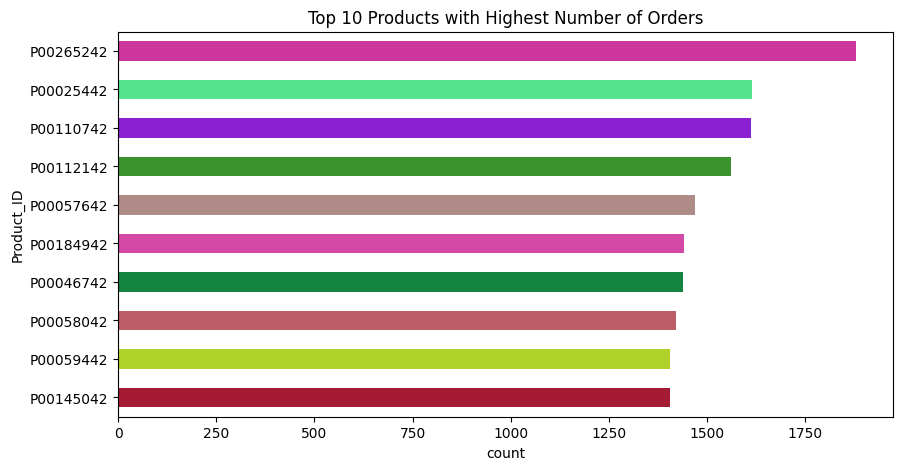

In [ ]:
count_by_product=df['Product_ID'].value_counts().reset_index()[:10]

plt.figure(figsize=(10,5))
sns.barplot(x=count_by_product["count"],y=count_by_product['Product_ID'],width=0.5,palette=random_colors)
plt.title('Top 10 Products with Highest Number of Orders')
plt.show()

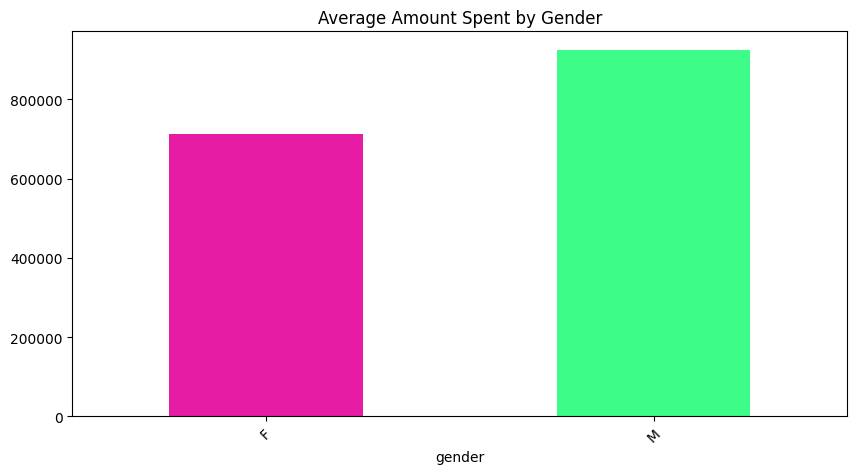

In [ ]:
#Average amount spent by each Gender
def calculate_unique(series):
  return series.unique()[0]

user_details=df.groupby('User_ID').agg(
    num_orders=('Product_ID','count'),
    gender=('Gender',calculate_unique),
    Age_group=('Age',calculate_unique),
    occupation=('Occupation',calculate_unique),
    city_Category=('City_Category',calculate_unique),
    stay_In_Current_City_Years=('Stay_In_Current_City_Years',calculate_unique),
    marital_Status=('Marital_Status',calculate_unique),
    amount_spent=('Purchase','sum')
).reset_index()


plt.figure(figsize=(10,5))
user_details.groupby('gender')["amount_spent"].mean().plot(kind='bar',color=random_colors)
plt.title('Average Amount Spent by Gender')
plt.xticks(rotation=45)
plt.show()

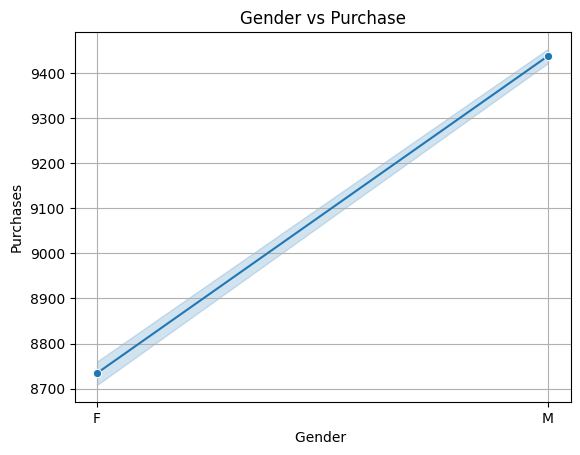

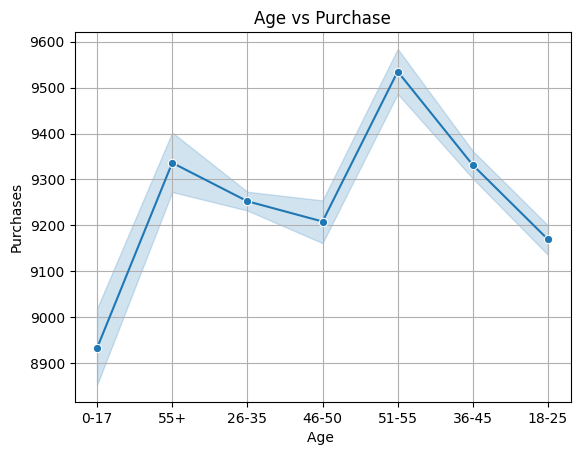

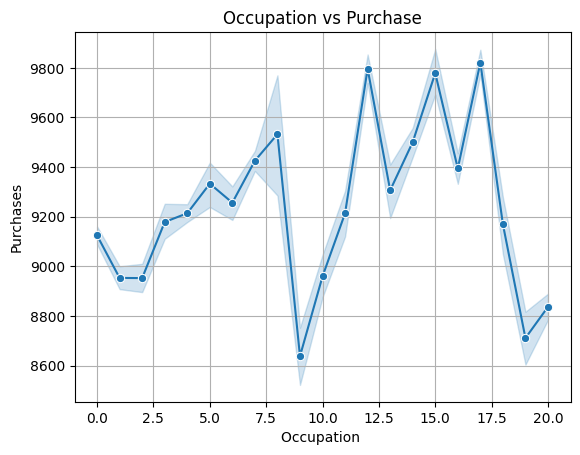

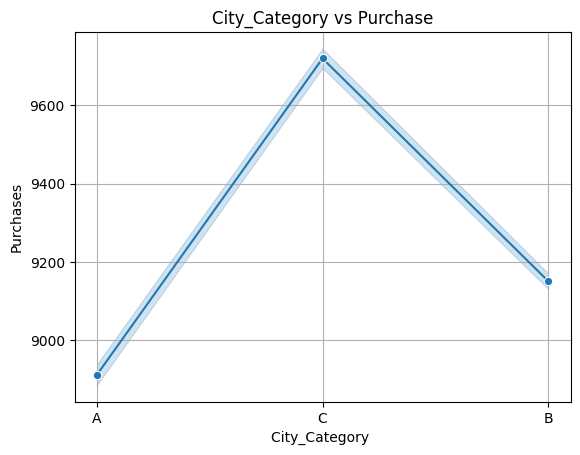

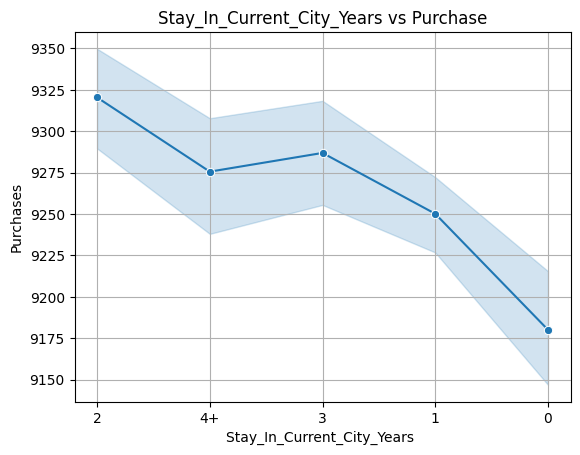

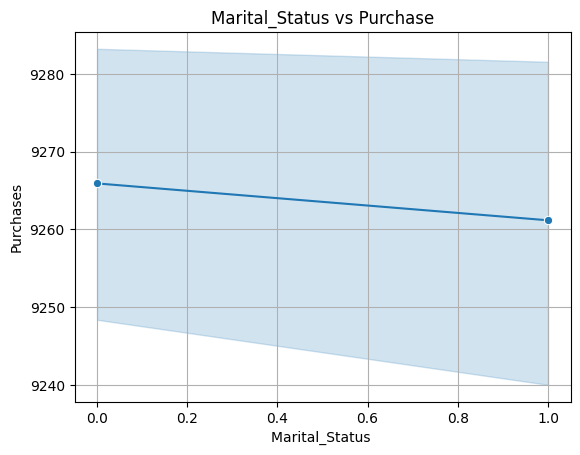

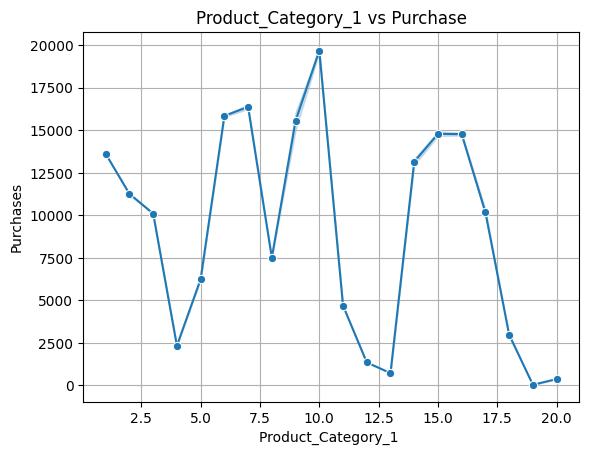

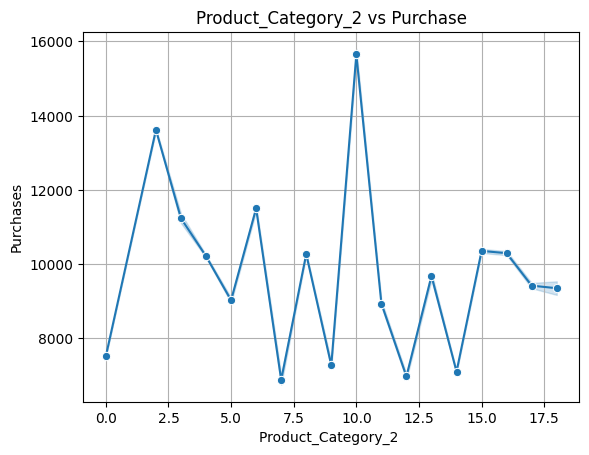

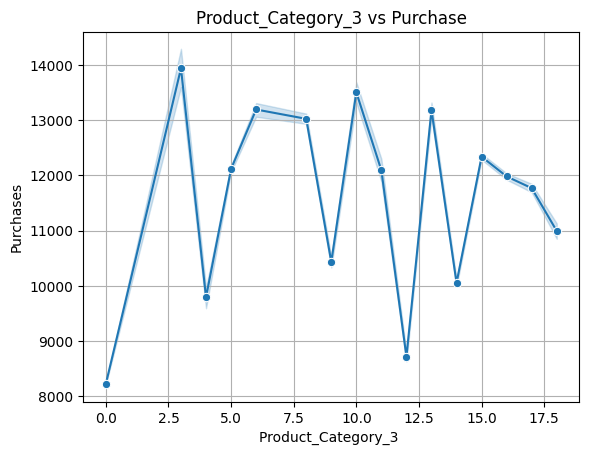

In [ ]:
for i, predictor in enumerate(new_df.drop(columns=['Purchase'])):
    plt.figure(i)
    sns.lineplot(data=new_df, x=predictor,y='Purchase',marker='o')
    plt.title(f'{predictor} vs Purchase')
    plt.xlabel(f'{predictor} ')
    plt.ylabel('Purchases')
    plt.grid(True)
    plt.show()